In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.stats import norm
from scipy.stats import poisson
import requests
from bs4 import BeautifulSoup

## Probability Distribution   
### Normal distribution .  
正規分布(normal distribution)は確率・統計学上最も有用な連続型の確率分布関数である。   
#### 正規分布の表現   
正規分布の確率密度関数$f(x)$は次式で表される。    

$$
f(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\{ -\frac{(x-\mu)^2}{2\sigma^2} \} 
$$ 

ここに、$\mu$は平均値、$\sigma^2$は分散($\sigma$は標準偏差)、$\pi$は円周率、$e$は自然定数の底

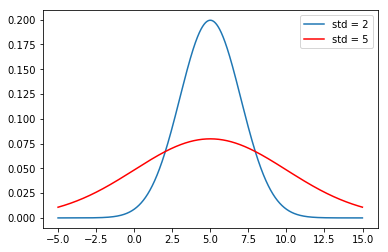

In [13]:
m = 5 # mean
std1 = 2 # standard deviation
std2 = 5 # standard deviation

x = np.arange(-5, 15, 0.01)
y1 = norm.pdf(x, loc = m, scale = std1)
y2 = norm.pdf(x, loc = m, scale = std2)

plt.plot(x, y1, label = "std = 2")
plt.plot(x, y2, color = "red", label = "std = 5")
plt.legend()

上図のように平均値$\mu$を中心として左右対称の分布の形状を示す。  
また分散$\sigma$は$x$の性質をを表すパラメーターの一つで全面積 = 1の条件では    

+ $\sigma^2$→大 : $x$のばらつきが大きい (グラフのピークが下がり、幅が広がる)   
+ $\sigma^2$→小 : $x$のばらつきが小さい (グラフのピークが上がり、幅が狭くなる)

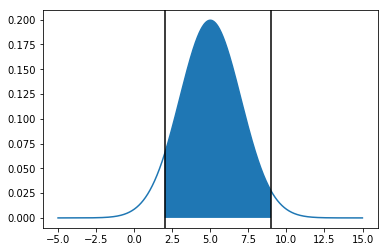

In [28]:
plt.plot(x, y1)
plt.axvline(x = 2, color = "black")
plt.axvline(x = 9, color = "black")

x_range = np.arange(2, 9, 0.01)
y_range = norm.pdf(x_range, loc = m, scale = std1)

plt.fill_between(x_range, y_range, 0)

連続型の確率とは上図で示すように区間[a, b] の領域の面積に等しい。すなわち連続変数$x$がこの区間内にある確率は次のように表現される。   
$$
P(a \leq x \leq b) = \int^{b}_{a} f(x)dx
$$  
また、連続変数$X$が正規分布に従う変数であるということを示す表現は次のようにおく。  
$$
x \sim N(\mu, \sigma)
$$

**標準正規分布**(standard normal distribution)とは、統計の検定などで使われるもので、正規分布に従う$x$を次のように変換する。  
この変換された$z$は平均値0, 分散1の正規分布となる。   
$$
z = \frac{x - \mu}{\sigma} \sim N(0, 1)
$$   
もとの$x$が存在する区間が[a, b]であるとき、正規分布に変換された$z$の区間は次となる。   
$$
[a, b] \to [\frac{a - \mu}{\sigma}, \frac{b - \mu}{\sigma}]
$$   
このとき、$P(a \leq x \leq b)$は上記の変換された区間での$z$に関する面積と等しい。  
<br />
<br />
**scipy.stats.norm**は正規分布に関するいくつかの計算を行う。    
+ **norm.ppf(percent point function)** : $\alpha$を与えて、確率(1-$\alpha$)となるパーセント点(片側)を求める。    
+ **norm.isf(inverse survival function)** : norm.ppfの(1-$\alpha$)を計算することなく直接$\alpha$からパーセント点を求める。   
+ **norm.interval** : 区間[$z_a$, $z_b$], (|$z_a$| = $z_b$)の確率(1-$\alpha$)を与えて、パーセント点$z_a$, $z_b$を求める。   
+ **norm.cdf(cumulative density function)** : パーセント点を与えて、この確率を求める。   
+ **norm.pdf(probability density function)** : 確率変数$x$を与えて確率密度関数$f(x)$の値を求める。   
+ **norm.rvs(random variates)** : 平均値loc, 標準偏差scale, サイズsizeのランダム変数を発生する。    
<br />
次のNotebookでは、区間[-1.65, 1.65]の場合の確率を求めている。  

In [29]:
za = 1.65
zb = -za
pa = norm.cdf(za, loc = 0, scale = 1)
pb = norm.cdf(zb, loc = 0, scale = 1)
p = pa - pb
print("p=", p)

p= 0.9010570639327038


のちに述べる検定では、$\alpha$(検定では有意水準という)を与えてから、パーセント点の片側($z_a$)、両側($z_a$, $z_b$)を求めることがよくある。   

In [30]:
za, zb = norm.interval(alpha = 0.95, loc = 0, scale = 1)
print("za=", za, ", zb=", zb)

za= -1.959963984540054 , zb= 1.959963984540054


#### 確率変数の生成
人工的に確率変数(random varibale)を生成するスクリプトは下の通り。   
+ 乱数発生の初期設定は`numpy.random.seed()`を用いる。この呼び出しをなしにすると計算結果を毎回異なるものにすることができる。  
+ 標準偏差の計算`x.std(ddof = 1)`でddofは1/(N-1)の除算を意味する。ddofを指定しないと1/Nの除算となり不偏標準偏差とならない。   

N = 100, mean = 2.0813272204710795, std = 3.401773012608586
N = 10000, mean = 2.031494698857792, std = 2.9918418705785657


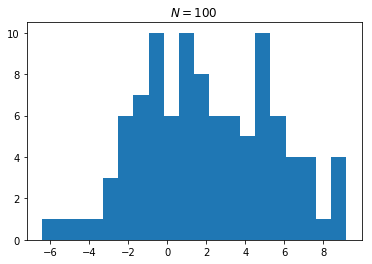

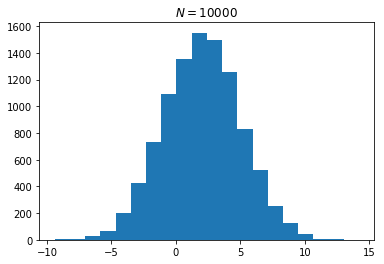

In [32]:
np.random.seed(123)

mean = 2.0  # mean
std = 3.0   # standard deviation

for N in [100, 10000] : 
    x = norm.rvs(loc = mean, scale = std, size = N) 
    print("N = {N}, mean = {mean}, std = {std}".format(N = N, mean = x.mean(), std = x.std(ddof = 1)))
    plt.figure()
    plt.hist(x, bins = 20)
    plt.title("$N = {}$".format(N))

生成した確率変数のデータに対するヒストグラムを見ると、データ数が10000点でようやく正規分布らしい形状が現れている。  

#### 中心極限定理   
+ ***中心極限定理***     
標本$x_1, x_2, \cdots, x_n$が独立で、期待値が$\mu$、標準偏差$\sigma$のある確率分布に従うとする。標本平均$\hat{\mu}$を   
$$
\hat{\mu} = \frac{x_1 + x_2 + \cdots + x_n}{n}
$$   
とする(\hat{\mu}は新たな確率変数となることに留意！)。    
標本の大きな$n$が大きくなるに連れて、この$\hat{\mu}$は平均$\mu$、標準偏差$\sigma / \sqrt{n}$の正規分布に近く。   
($n$が大きくなるにつれて、分布の幅が狭くなる。)    
<br />
<br />
この定理は、母集団の確率分布がどのようなものであっても$n$が十分大きければその標本平均$\hat{\mu}$は正規分布$N(\mu, \sigma^2 / n)$に従うと皆しても良いと述べている。   
このことが正規分布がよく用いられる理由の一つである。   

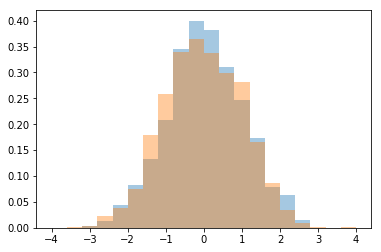

In [41]:
N = 2000
y = np.zeros(N)
for n in [5, 5000] : 
    for i in range(N) : 
        x = scipy.stats.uniform.rvs(size = n)
        y[i] = (x.mean() - 1/2) / (np.sqrt(1/12)/np.sqrt(n))   # 生成する変数は一様乱数(平均1/2, 分散 1/12)
    plt.hist(y, bins = 20, range = (-4, 4), density = True, alpha =.4)

### Poisson Distribution    
ポアソン分布(Poisson distribution)は時間間隔(0, $t$]の中で平均$\lambda$回発生する確率事象が$k$回($k = 0,1,2, \cdots$)発生する確率を表現するのに用いられ、次式で示される。   
$$
P(X=k)=e^{-\lambda t} \frac{(\lambda t)^k}{k!}
$$   
ポアソン分布に従う確率変数は次の性質がある。   

1. (独立性)事象が起きるのは互いに独立である。  
1. (定常性)事象が起きる確率はどの時間帯でも同じである。  
1. (希少性)微小時間$t$の間にその事象が2回以上起きる確率は無視できるくらい小さいとする。   
<br />
ポアソン分布が適応される例として、交通事故発生確率、1日に受け取る電子メールの件数、単位時間あたりのWebサーバーへのアクセス数、単位時間あたりに店やATMなどに訪れる客の数などがある。   

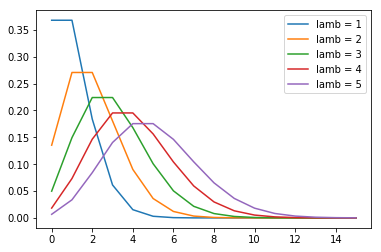

In [7]:
k = np.arange(0, 16)
for lamb in range(1, 6) : 
    p = poisson.pmf(k, lamb) 
    plt.plot(k, p, label = "lamb = " + str(lamb))
    plt.legend()

上図をみて$\lambda$が大きくなるにつれて分布形状がなだらかかつ右に移行することが認められる。  

#### ポアソン分布の例
例題3.1) ある都市の交通事故は1日平均2.4件ある。1日に起こる交通事故の件数がポアソン分布に従うと仮定したとき1日の交通事故が2件以下になる確率を求めよ。   
<br />
[解説] 求める確率は$P(X \leq 2)=P(X=0)+P(X=1)+P(X=2)$である。この右辺の三つを順に求めて解を得るスクリプトを次に示す。    

In [8]:
lamb = 2.4
psum = 0 

for k in range(3) : 
    p = poisson.pmf(k, mu = lamb)
    psum += p

print("sum of p", psum)

sum of p 0.5697087466575105


結果より約57%の確率で2件以下の事故が発生する。   

例題3.2) FIFAW杯、サッカー2002年と2006年大会における1次リーグ48試合の得点を調べ、その特徴を考察せよ。    
<br />
[解説] 試合で対戦する2チームの得点両方を合計した値を1試合の得点としてこの頻度を求める。

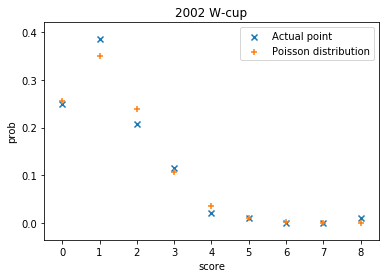

In [141]:
# 2002 w杯の一次リーグ得点データをwebからスクレイピング
w_2002 = requests.get("http://www.tsp21.com/sports/soccer/wc2002/result.html")
soup_2002 = BeautifulSoup(w_2002.content)

#  2002 w杯の一次リーグの得点データを抽出
table_2002 = soup_2002.find_all("table")[-2]

# 得点データを入れる空リスト→得点データを入れる
score_2002 = []
for s in table_2002.find_all("td", {"class":"scc"}) : 
    if s.get_text() != "-" : 
        score_2002.append(int(s.get_text()))

#  得点データを集計
prob_2002 = {str(i) : score_2002.count(i) / len(score_2002) for i in range(np.max(score_2002) + 1)}

# 得点の平均をlambdaとしてポアソン分布を作成
lamb_2002 = np.mean(score_2002)
poiss_2002 = {str(i) : poisson.pmf(i, mu = lamb_2002) for i in range(np.max(score_2002) + 1)}

# 実際の得点分布とポアソン分布のプロット
plt.scatter(prob_2002.keys(), prob_2002.values(), marker = "x", label = "Actual point")
plt.scatter(poiss_2002.keys(), poiss_2002.values(), marker = "+", label = "Poisson distribution")
plt.xlabel("score")
plt.ylabel("prob")
plt.title("2002 W-cup")
plt.legend()

2002年W杯の得点分布はポアソン分布に近いことが認められる。

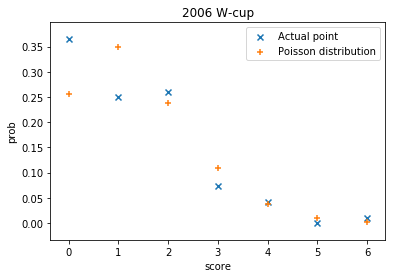

In [142]:
# 2006 w杯の一次リーグ得点データをwebからスクレイピング
w_2006 = requests.get("http://germany2006.nikkansports.com/schedule/league/league-top.html")
soup_2006 = BeautifulSoup(w_2006.content)

# 得点データを入れる空リスト→得点データを入れる
table_2006 = soup_2006.find_all("td", {"class":"tdScore"})
score_2006 = []
for s in table_2006 : 
    x = s.get_text()
    for text in x : 
        for letter in text : 
            if letter != '－' : 
                score_2006.append(int(letter))

# 得点データを集計
prob_2006 = {str(i) : score_2006.count(i) / len(score_2006) for i in range(np.max(score_2006) + 1)}

# 得点の平均をlambdaとしてポアソン分布を作成
lamb_2006 = np.mean(score_2006)
poiss_2006 = {str(i) : poisson.pmf(i, mu = lamb_2002) for i in range(np.max(score_2006) + 1)}

# 実際の得点分布とポアソン分布のプロット
plt.scatter(prob_2006.keys(), prob_2006.values(), marker = "x", label = "Actual point")
plt.scatter(poiss_2006.keys(), poiss_2006.values(), marker = "+", label = "Poisson distribution")
plt.xlabel("score")
plt.ylabel("prob")
plt.title("2006 W-cup")
plt.legend()

一方、2006年の得点分布はポアソン分布とは似通った分布とは言い難い。これは無得点試合が増えたからで近代サッカーの戦術の影響であろうか？

ここで、少し乱暴であるがサッカーの得点は2002年のようにポアソン分布に従うと仮定する。   
この仮定のもとで弱いチーム(A)と強いチーム(B)が対戦したときに弱いチームが勝つ確率を考える。  
<br />
Aチームの1試合あたり平均得点が$\lambda_A=1$点、Bチームが$\lambda_B=2$点とする。  
例えばAチームが1点、Bチームが2点得点したことを$(A,B)=(1,2)$と表記するとき、Aチームが勝つ確率は$(A,B)=(1,0), (2,1), (3,2), (3,1), \cdots$である。各場合の確率を求めると、例えば$(A,B)=(2,1)$となる確率は   
$$
\frac{\lambda_A^{k_A}}{k_A!}e^{-\lambda_A}\cdot \frac{\lambda_B^{k_B}}{k_B!}e^{-\lambda_B}=
\frac{1^2}{2!}e^{-1}\cdot\frac{2^1}{1!}e^{-2}=0.0498
$$    
となる。   
このようにAチームが勝つ確率をある程度収束するまで計算を続けるとAチームが勝つ確率は18.2%となる。   
Aチームが勝つ確率は下のように約39.4%となり10回対戦すれば4回程度は勝ち点を得られる計算となる。

In [151]:
# 今回はシュミレーションでAチームとBチームが勝つ確率を計算する。
np.random.seed(123)
lamb_A = 1
lamb_B = 2

# 各チームの得点をシュミレート
score_A = poisson.rvs(mu = lamb_A, size = 10000000)
score_B = poisson.rvs(mu = lamb_B, size = 10000000)

# Bが勝つ確率
print(np.mean(score_A < score_B))
# 引き分けの確率
print(np.mean(score_A == score_B))
# Aが勝つ確率
print(np.mean(score_A > score_B))

0.605604
0.2116757
0.1827203


一方、得点力に2倍の差があって野球のようにAチームが平均3点、Bチームが平均6点の場合はどうだろうか。

In [152]:
np.random.seed(123)
lamb_A = 3
lamb_B = 6

# 各チームの得点をシュミレート
score_A = poisson.rvs(mu = lamb_A, size = 10000000)
score_B = poisson.rvs(mu = lamb_B, size = 10000000)

# Bが勝つ確率
print(np.mean(score_A < score_B))
# 引き分けの確率
print(np.mean(score_A == score_B))
# Aが勝つ確率
print(np.mean(score_A > score_B))

0.7994197
0.0832027
0.1173776


Aチームが勝つ確率は約11.7%、Bチームが勝つ確率は約8%とグッと低くなる。  
このように確率論から考えると攻撃力がサッカーのように少ない得点力でかつ1点差程度ならば番狂わせが高い頻度で生じることが指摘できる。

#### Poisson到着モデルのシュミレーション    
オペレーションズリサーチ分野で待ち行列理論(queueing theory)がある。客がてんでばらばらに到着する場合。統計的性質である定常性、独立性、希少性が成り立つものと考え、到着の様子をPoisson分布で表現する。  
ある一定の$t$時間あたり到着する客の人数がPoisson分布に従うということは次式で表される。   
$$
P(k)=e^{-\lambda t} \frac{(\lambda t)^k}{k!}
$$    
ここに$k$は到着する客数、$\lambda$[人/s]は平均到着率($t$時間あたりに到着する客数の平均値)で、上式は「$t$時間以内にk人の客が到着する確率」を表す。この到着のことを**Poisson到着(Poisson arrival)**という。　　　   
<br />
$t=1$とおいて単位時間あたりの到着する人数の確率を考える。     
$$
P(k)=e^{-\lambda} \frac{(\lambda)^k}{k!}
$$       
この式を用いれば、例えば単位時間あたり平均6人($\lambda=6$)であるときに、8人の客($k = 8$)が到着する確率は次となる。     
$$
P(8)=e^{-6} \frac{(6)^8}{8!} \approx 0.103
$$

##### 到着時間の分布     
Poisson到着のとき、客の到着時間の間隔は指数分布に従う。このことを証明する時間$T$の間に事象が1回も起きない確率は上式より    
$$
P(0)=e^{-\lambda T}
$$    
となり、これは見方を変えると、事象が起きる時間間隔が$T$より長い確率は     
$$
P^c(T)=e^{-\lambda T}
$$    
で表せられるといって良い。ここで$P$の上付き$c$はcompleteを表している。したがって、事象が起きる時間間隔が$T$以下、すなわちある客が到着してから$T$時間以内で次の客が到着する確率は   
$$
P_{arr}(T) = 1 - P^c(T)=1-e^{-\lambda T}
$$     
となり、上式の両辺を微分すると、、、     
$$
f_{arr}(T) = \lambda e^{-\lambda T}
$$       
これは指数分布(exponential distribution)である。すなわちPoisson到着のとき、客の到着時間は指数分布にしたがう。    
シュミレーションで確率変数である$T$を派生させたい場合、上式を$T$について解いて以下を得る。     
$$
T = -\frac{1}{\lambda}\log_eP_{arr}(T)
$$    
ここの$P_{arr}(t)$に一様乱数$U(0, 1)$を与えることで、$T$を生成するできる。ここで$U(0, 1)$の性質から$1-P_{arr}(t)$と$P_{arr}(T)$の統計的性質は同じである。   
<br />
以下にNum人分の客の到着時間をPython3でシュミレートする。     

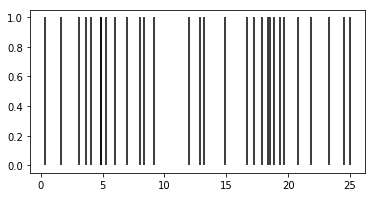

In [6]:
np.random.seed(123)

num = 30   # the number of arrival
t_arr = np.zeros(num)
lamb = 1   # lambda

sum = 0.0
for i in range(num) : 
    sum = sum - (1/lamb) * np.log(scipy.stats.uniform.rvs(size = 1))
    t_arr[i] = sum

fig, ax = plt.subplots(figsize = (6, 3))
ax.vlines(t_arr, ymin = 0, ymax = 1)

この結果は客が到着した時刻に縦線が引かれている。横軸は単位時間であり、時間間隔が開くほどに客の到着確率が低くくなることがこの結果が見て取れ、客の到着時間の確率は指数状である。    

### 確率分布とパッケージ関数     
`scipy.stats`には様々な確率分布を提供している。   
**離散確率分布** : ベルヌーイ分布、二項分布、ポアソン分布   
**連続確率分布** : カイ二乗分布、指数分布、F分布、正規分布、t分布、一様分布    
ここで、それぞれの確率分布関数の性質を求める計算は複雑であるが、`scipy.stats`を用いれば容易に計算できる。`scipy.stats`は共通的な関数名を採用している。例えば、正規分布でppf(percent point function)を用いてパーセント点を求めたいときには`scipy.stats.norm.ppf`という表記をとる。   
この最後の`.ppf`は様々な関数名に変えることができる。     
<br />

|関数名|機能|
|:-----|-----:|
| ppf(percent point function) | (1 - $\alpha$)→$x_p$ |
| isf(inverse survival function) | $\alpha$→$x_p$ |
| interval | $P(x_a \leq X \leq x_b)$ → [x_a, x_b] |
| cdf(cumulative distribution function) | $x_p$ → $P(-\inf \leq X \leq x_p)$ |
| pdf(probability density function) | $x$ → $f(x)$ |
| rvs(random variates) | $X$を生成 |

#### ベルヌーイ分布(Bernoulli distribution)      
ベルヌーイ分布とはベルヌーイ試行の結果を0と1で表した分布。ベルヌーイ試行は以下の条件を満たす。   
1. 試行の結果は成功または失敗である。   
1. 各試行は独立である。    
1. 成功確率$p$、失敗確率$(1-p)$は試行を通じて独立である。   
<br />

確率質量関数を$f(k)$とおき、$x$がベルヌーイ分布に従う確率変数とするとき、     

$$
f(k) = p^k(1-p)^{1-k}  for \ k \in [0, 1]  \\  
E[x] = p   \\
V[x] = p(1 - p) \\
$$    

$k$は0か1しか取らないことに注意されたい。また、離散型の場合、$x = k$となる確率$P(x = k)$は$f(k)$に等しい(他の離散型分布関数も同様)。   
<br />

パッケージ関数名：`scipy.stats.bernoulli`

#### 二項分布(binomial distribution)     
次の試行を考える。    
1. 各試行に置いて、その事象が発生するか否かのみを問題にする。   
1. 各試行は独立である。   
1. 事象が発生する確率$p$は一定とする。   
<br />

一回の試行において、事象$A$が発生する確率を$p$とする。$n$回の試行において、事象$A$が起こる回数を表す確率変数を$x$とし、これが確率質量関数を$f(k)$に従うとき。     

$$
f(k) = {}_n \mathrm{ C }_k p^k (1 - p)^{n-k}  \\
E[x] = np  \\
V[x] = np(1- p)  \\
$$

<br />

パッケージ関数名：`scipy.stats.binom`

#### ポアソン分布(Poisson distribution)      
ポアソン分布の説明は前項を確認。ポアソン分布は時間間隔$t$の中で平均$\lambda$回発生する確率事象が$k$回$(k = 0,1,2, \cdots)$発生する確率を表現するのに使われる。    
ポアソン分布に従う確率変数は次の性質がある。    
<br />

1. 各事象は独立である。    
1. 事象が起きる確率はどの時間も同じである。   
1. 微小時間の間にその事象が2回以上起きる確率は無視できるくらい小さい。   

確率質量関数を$f(k)$とおくとき、$x$がポアソン分布に従う確率変数のとき。    

$$
f(k) = \exp(-\lambda t) \frac{(\lambda t)^k}{k!} \quad (k = 0,1,2, \cdots) \\
E[x] = \lambda \\
V[x] = \lambda \\
$$   

<br />

パッケージ関数名：`scipy.stats.poisson`

#### カイ二乗分布(chi-squared distribution)     
カイ二乗分布($\chi^2$分布)は、カイ二乗検定やフリードマン検定に利用される。また、のちに説明する$t$分布の性質に関与するなど、統計学で広く利用されるものである。    
$z_1, z_2, \cdots, z_N$をそれぞれ標準正規分布$N(0, 1)$に従う互いに独立な確率変数とするとき、次で定義される新たな確率変数。    

$$
\chi_{N}^2 = z_1^2 + z_2^2 + \cdots + z_m^2
$$   

を自由度$m$のカイ二乗分布という。ここでいう自由度とは$z_i^2$をいくつ加えたかを表す。    
<br />  

自由度$m$の確率密度分布を$f(m,x)$とおいたとき。     

$$
f(m,x) = \frac{1}{2^{m/2}\Gamma(\frac{m}{2})} x^{m/2-1}e^{-x/2} \\
E[x] = m \\
V[x] = 2m \\
$$    
ここに$\Gamma(.)$はガンマ関数(gamma function)であり、また$x<0$では$f(m,x) = 0$である。    

<br />    

パッケージ関数名：`scipy.stas.chi2`